<a href="https://colab.research.google.com/github/MirSh4/HateDetection/blob/main/distilbert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle==1.5.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73026 sha256=696bfe52d8f89204284f1d4894f7b9e0dc1a4051d84853ee7eb72e87643becbb
  Stored in directory: /root/.cache/pip/wheels/2e/27/39/f44e52756a6407b444143f233abe9fda0e18a23e8b20e0cd1c
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.6.17
    Uninstalling kaggle-1.6.17:
      Successfully uninstalled kaggle-1.6.17


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mirnasherif","key":"9de74dc41a6a2c4343287f3ab106ef27"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#!git clone https://github.com/ubisoft/ubisoft-laforge-toxbuster

In [5]:
import pandas as pd

In [6]:
#data=pd.read_csv('/content/ubisoft-laforge-toxbuster/data/CONDA.csv', delimiter=';')

In [7]:
#data.shape

In [8]:
#data.head(100)

In [9]:
# Install required libraries
!pip install datasets transformers evaluate accelerate -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [10]:
# Download dataset
!kaggle datasets download -d julian3833/jigsaw-toxic-comment-classification-challenge



 90% 48.0M/53.4M [00:00<00:00, 132MB/s]
100% 53.4M/53.4M [00:00<00:00, 122MB/s]


In [11]:
# Unzip
!unzip jigsaw-toxic-comment-classification-challenge.zip

Archive:  jigsaw-toxic-comment-classification-challenge.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: test_labels.csv         
  inflating: train.csv               


In [12]:
# Load CSV
import pandas as pd
df= pd.read_csv("train.csv")


In [13]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [14]:
import numpy as np
df['binary'] = np.where(df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) > 0, 1, 0)

In [15]:
df.drop([ 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'], axis=1, inplace=True)
df.rename(columns={'binary': 'toxic','comment_text':'content'}, inplace=True)
df.head(10)

,id,content,toxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0
9,00040093b2687caa,alignment on this subject and which are contra...,0


In [16]:
# Define gaming slang phrases (toxic examples)
gaming_slang_toxic = [
    "gg ez noob uninstall",
    "kys trash player",
    "bot lane diff",
    "report this feeder",
    "you're hardstuck bronze",
    "0 IQ gameplay"
]



if isinstance(df, pd.DataFrame):
    # For Kaggle DataFrame
    new_rows = pd.DataFrame({
        "content": gaming_slang_toxic,
        "toxic": [1] * len(gaming_slang_toxic)  # Assuming binary toxicity
    })
    df = pd.concat([df, new_rows], ignore_index=True)



In [17]:
#Clean data
def clean(data, col):

    # Clean some punctutations
    data[col] = data[col].str.replace('\n', ' \n ')
    # Remove ip address
    data[col] = data[col].str.replace(r'(([0-9]+\.){2,}[0-9]+)',' ')

    data[col] = data[col].str.replace(r'([a-zA-Z]+)([/!?.])([a-zA-Z]+)',r'\1 \2 \3')
    # Replace repeating characters more than 3 times to length of 3
    data[col] = data[col].str.replace(r'([*!?\'])\1\1{2,}',r'\1\1\1')
    # patterns with repeating characters
    data[col] = data[col].str.replace(r'([a-zA-Z])\1{2,}\b',r'\1\1')
    data[col] = data[col].str.replace(r'([a-zA-Z])\1\1{2,}\B',r'\1\1\1')
    data[col] = data[col].str.replace(r'[ ]{2,}',' ').str.strip()
    # Add space around repeating characters
    data[col] = data[col].str.replace(r'([*!?\']+)',r' \1 ')

    return data

df = clean(df,'content')
df['content'] = df['content'].astype(pd.StringDtype())
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159577 entries, 0 to 159576
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       159571 non-null  object
 1   content  159577 non-null  string
 2   toxic    159577 non-null  int64 
dtypes: int64(1), object(1), string(1)
memory usage: 3.7+ MB


In [18]:
# prompt: split the train test val with a stratify to toxic

from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame with 'content' and 'toxic' columns
train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df['toxic'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['toxic'], random_state=42)

print(f"Train size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")
print(f"Test size: {len(test_df)}")

Train size: 127661
Validation size: 15958
Test size: 15958


In [19]:
def count_labels(df, label_column='toxic'):
    """Counts the occurrences of 0 and 1 in a specified column of a DataFrame.

    Args:
        df: The input DataFrame.
        label_column: The name of the column containing the labels (default: 'toxic').

    Returns:
        A dictionary with counts of 0 and 1.
    """
    counts = df[label_column].value_counts().to_dict()
    return {
        0: counts.get(0, 0),  # Get count of 0, default to 0 if not found
        1: counts.get(1, 0)   # Get count of 1, default to 0 if not found
    }

# Get counts for each split
train_counts = count_labels(train_df)
val_counts = count_labels(val_df)
test_counts = count_labels(test_df)

# Print the results
print("Train set:", train_counts)
print("Validation set:", val_counts)
print("Test set:", test_counts)


Train set: {0: 114676, 1: 12985}
Validation set: {0: 14335, 1: 1623}
Test set: {0: 14335, 1: 1623}


In [20]:
!pip install nlpaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 9.7 MB/s eta 0:00:00


In [21]:
# Data augmentation for minority class
from nlpaug.augmenter.word import SynonymAug
import nltk

nltk.download('averaged_perceptron_tagger_eng')

aug = SynonymAug(aug_src='wordnet')

augmented_samples = []
for text in train_df[train_df['toxic'] == 1]['content']:
    if isinstance(text, str) and text == text:  # Check for NaN
        augmented_text = aug.augment(text)
        augmented_text = augmented_text[0] if isinstance(augmented_text, list) else augmented_text
        augmented_samples.append(augmented_text)



df_augmented = pd.DataFrame({"content": augmented_samples, "toxic": [1] * len(augmented_samples)})
train_df = pd.concat([train_df, df_augmented], ignore_index=True)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [22]:
from sklearn.utils import resample
df_majority = train_df[train_df['toxic'] == 0]

df_minority = train_df[train_df['toxic'] == 1]

# Oversample minority class
df_minority_oversampled = resample(
    df_minority,
    replace=True,  # Sample with replacement
    n_samples=len(df_majority),  # Match majority class size
    random_state=42
)

# Combine majority and oversampled minority
df_balanced = pd.concat([df_majority, df_minority_oversampled])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check class distribution
print(df_balanced['toxic'].value_counts())
train_df = df_balanced.copy()


toxic
1    114676
0    114676
Name: count, dtype: int64


In [23]:
# Tokenize data
from datasets import Dataset
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")


def preprocess_function(examples):
    # Tokenize the text and truncate/pad sequences
    #attention_mask: Mask indicating which tokens are actual words and which are padding.
    tokenized_examples = tokenizer(examples["content"], padding="max_length", truncation=True)
    # Include the labels in the output dictionary
    tokenized_examples["labels"] = examples["toxic"]
    return tokenized_examples

train_dataset = Dataset.from_pandas(train_df).map(preprocess_function, batched=True, remove_columns=['content'])
val_dataset = Dataset.from_pandas(val_df).map(preprocess_function, batched=True, remove_columns=['content'])
test_dataset = Dataset.from_pandas(test_df).map(preprocess_function, batched=True, remove_columns=['content'])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/229352 [00:00<?, ? examples/s]

Map:   0%|          | 0/15958 [00:00<?, ? examples/s]

Map:   0%|          | 0/15958 [00:00<?, ? examples/s]

In [24]:
# Compute class weights
from sklearn.utils.class_weight import compute_class_weight
import torch
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_df['toxic']),
    y=train_df['toxic']
)
class_weights = torch.tensor(class_weights, dtype=torch.float32)

In [25]:
# Get counts for each split
train_counts = count_labels(train_df)
val_counts = count_labels(val_df)
test_counts = count_labels(test_df)

# Print the results
print("Train set:", train_counts)
print("Validation set:", val_counts)
print("Test set:", test_counts)

Train set: {0: 114676, 1: 114676}
Validation set: {0: 14335, 1: 1623}
Test set: {0: 14335, 1: 1623}


In [26]:
# Train and evaluate models
from transformers import TrainingArguments, AutoModelForSequenceClassification, Trainer
import evaluate
import torch

# Setup
model_name = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2).to(device)

# Training arguments
args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    fp16=torch.cuda.is_available(),
    save_total_limit=1,
    load_best_model_at_end=True,
    metric_for_best_model="eval_accuracy",
    report_to="none",
)

# Metrics
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")

# Trainer
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=lambda eval_pred: {
        "accuracy": accuracy_metric.compute(predictions=np.argmax(eval_pred.predictions, axis=-1), references=eval_pred.label_ids)["accuracy"],
        "f1": f1_metric.compute(predictions=np.argmax(eval_pred.predictions, axis=-1), references=eval_pred.label_ids, average="weighted")["f1"]
    },
)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [27]:
# Train and save model
trainer.train()
trainer.save_model(f"./{model_name}-finetuned")

# Evaluate
results = trainer.evaluate()
print(f"\n=== Model Performance ===\n{model_name}:\n")
print(f"Accuracy: {results['eval_accuracy']:.4f}\n")
print(f"F1-Score: {results['eval_f1']:.4f}\n")

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.064800,0.163996,0.957576,0.959410
2,0.028800,0.198438,0.966788,0.966751



=== Model Performance ===
distilbert-base-uncased:

Accuracy: 0.9668

F1-Score: 0.9668



In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import torch

# Generate predictions
# Evaluate on test dataset
test_results = trainer.evaluate(test_dataset)
print(f"\n=== Test Performance ===\n  Accuracy: {test_results['eval_accuracy']:.4f}\n  F1-Score: {test_results['eval_f1']:.4f}")

# Generate predictions for test dataset
test_predictions = trainer.predict(test_dataset)
preds = np.argmax(test_predictions.predictions, axis=-1)
labels = test_predictions.label_ids  # True labels from test_dataset



=== Test Performance ===
  Accuracy: 0.9676
  F1-Score: 0.9675


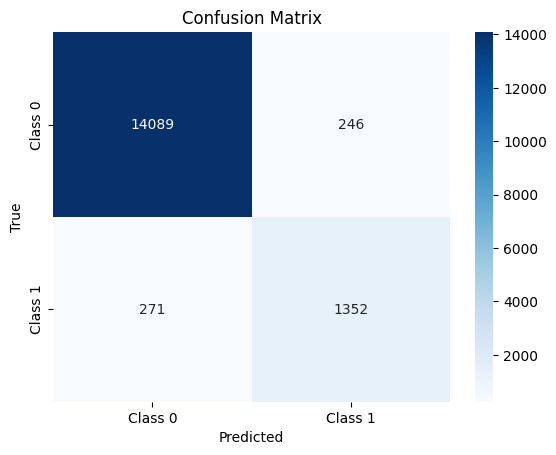

In [29]:
# Confusion matrix
cm = confusion_matrix(labels, preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

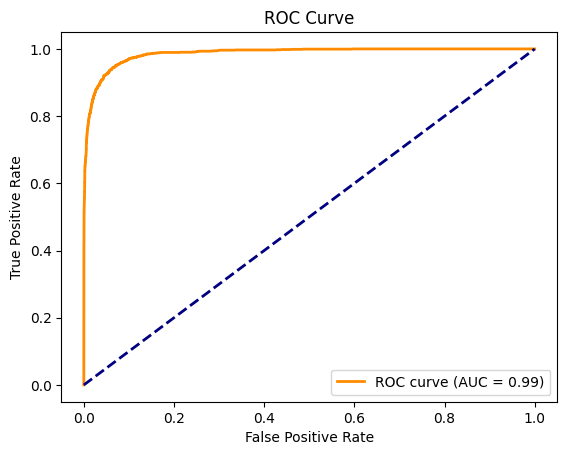

In [30]:
# ROC curve and AUC
probs = torch.softmax(torch.tensor(test_predictions.predictions), dim=-1).numpy()[:, 1]  # Probabilities for class 1
fpr, tpr, _ = roc_curve(labels, probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [33]:

from google.colab import files
tokenizer.save_pretrained("distilbert-base-uncased-finetuned")
trainer.save_model("distilbert-base-uncased-finetuned")
# Assuming your model is saved in a folder named 'distilbert-base-uncased-finetuned'
!zip -r my_model.zip distilbert-base-uncased-finetuned/
files.download('my_model.zip')

updating: distilbert-base-uncased-finetuned/ (stored 0%)
updating: distilbert-base-uncased-finetuned/config.json (deflated 46%)
updating: distilbert-base-uncased-finetuned/model.safetensors (deflated 8%)
updating: distilbert-base-uncased-finetuned/training_args.bin (deflated 51%)
  adding: distilbert-base-uncased-finetuned/vocab.txt (deflated 53%)
  adding: distilbert-base-uncased-finetuned/special_tokens_map.json (deflated 42%)
  adding: distilbert-base-uncased-finetuned/tokenizer.json (deflated 71%)
  adding: distilbert-base-uncased-finetuned/tokenizer_config.json (deflated 75%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>